# Telco Classification Project

# Project Planning

Plan -> Acquire -> Prepare -> Explore -> Model & Evaluate -> Deliver <br> <br>
Telco is a telecommunications company that has a problem: too many customers are churning. The goal of this project is to develop machine learning classification models that can help determine the reasons for high customer churn rates. These models will be developed using Python.

# Business Goals <br>
- Find drivers of customer churn <br>
- Develop a machine learning classification model that will predict customer churn

# Executive Summary

XXXXXXXXXX <br>
XXXXXXXXXX <br>
Fill out later <br>
XXXXXXXXXX <br>
XXXXXXXXXX <br>

# Acquire Data
###### <br> Creating functions that will import data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import os

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

from env import user, password, host
#import acquire
#import prepare
import explore

In [2]:
# this function be used to access the SQL server
# the user, host, and password will come from importing 'env'

def get_connection(db, user=user, host=host, password=password):
    '''
    This function creates a connection to the Codeup db.
    It takes db argument as a string name.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [3]:
def new_telco_data():
    '''
    This function gets new telco data from the Codeup database.
    '''
    sql_query = """
                SELECT *
                FROM customers
                JOIN contract_types USING(contract_type_id)
                JOIN internet_service_types USING(internet_service_type_id)
                JOIN payment_types USING(payment_type_id);
                """
    # Read in dataframe from Codeuo
    df = pd.read_sql(sql_query,get_connection('telco_churn'))
    return df

In [4]:
def get_telco_data():
        '''
        This function gets telco data from csv, or otherwise from Codeup database.
        '''
        if os.path.isfile('telco.csv'):
            df = pd.read_csv('telco.csv', index_col = 0)
        else:
            df = new_telco_data()
            df.to_csv('telco.csv')
        return df

In [5]:
df = get_telco_data()
df.head

<bound method NDFrame.head of       payment_type_id  internet_service_type_id  contract_type_id customer_id  \
0                   2                         1                 3  0016-QLJIS   
1                   4                         1                 3  0017-DINOC   
2                   3                         1                 3  0019-GFNTW   
3                   4                         1                 3  0056-EPFBG   
4                   3                         1                 3  0078-XZMHT   
...               ...                       ...               ...         ...   
7038                2                         3                 1  9962-BFPDU   
7039                2                         3                 1  9967-ATRFS   
7040                4                         3                 1  9970-QBCDA   
7041                2                         3                 1  9975-SKRNR   
7042                3                         3                 1  9986-BONCE  

In [6]:
df = pd.DataFrame(df)
df.head()

payment_type_id  internet_service_type_id  contract_type_id customer_id  \
0                2                         1                 3  0016-QLJIS   
1                4                         1                 3  0017-DINOC   
2                3                         1                 3  0019-GFNTW   
3                4                         1                 3  0056-EPFBG   
4                3                         1                 3  0078-XZMHT   

   gender  senior_citizen partner dependents  tenure phone_service  ...  \
0  Female               0     Yes        Yes      65           Yes  ...   
1    Male               0      No         No      54            No  ...   
2  Female               0      No         No      56            No  ...   
3    Male               0     Yes        Yes      20            No  ...   
4    Male               0     Yes         No      72           Yes  ...   

  tech_support streaming_tv streaming_movies paperless_billing  \
0          Yes          Yes              Yes               Yes   
1          Yes          Yes               No                No   
2          Yes           No               No                No   
3          Yes           No               No               Yes   
4          Yes          Yes              Yes               Yes   

  monthly_charges total_charges churn contract_type  internet_service_type  \
0           90.45        5957.9    No      Two year                    DSL   
1           45.20       2460.55    No      Two year                    DSL   
2           45.05        2560.1    No      Two year                    DSL   
3           39.40         825.4    No      Two year                    DSL   
4           85.15        6316.2    No      Two year                    DSL   

                payment_type  
0               Mailed check  
1    Credit card (automatic)  
2  Bank transfer (automatic)  
3    Credit card (automatic)  
4  Bank transfer (automatic)  

[5 rows x 24 columns]

In [7]:
df.shape

(7043, 24)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [9]:
df.describe().T

count       mean        std    min   25%    50%  \
payment_type_id           7043.0   2.315633   1.148907   1.00   1.0   2.00   
internet_service_type_id  7043.0   1.872923   0.737796   1.00   1.0   2.00   
contract_type_id          7043.0   1.690473   0.833755   1.00   1.0   1.00   
senior_citizen            7043.0   0.162147   0.368612   0.00   0.0   0.00   
tenure                    7043.0  32.371149  24.559481   0.00   9.0  29.00   
monthly_charges           7043.0  64.761692  30.090047  18.25  35.5  70.35   

                            75%     max  
payment_type_id            3.00    4.00  
internet_service_type_id   2.00    3.00  
contract_type_id           2.00    3.00  
senior_citizen             0.00    1.00  
tenure                    55.00   72.00  
monthly_charges           89.85  118.75

In [10]:
def object_vals(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            print(df[col].value_counts(dropna = False))

In [11]:
def col_range(df):
    stats_df = df.describe().T
    stats_df['range'] = stats_df['max'] - stats_df['min']
    return stats_df

In [12]:
# Create a function to summaris my dataframe

def summarize_df(df):
    print(f'The dataframe has {df.shape[0]} rows and {df.shape[1]} columns.')
    print('------------------------------------------------------')
    print(df.info())
    print('------------------------------------------------------')
    print(df.head())
    print('------------------------------------------------------')
    object_vals(df)
    print('------------------------------------------------------')
    print(col_range(df))
    

In [13]:
summarize_df(df)

The dataframe has 7043 rows and 24 columns.
------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup      

# Prepare Data

In [14]:
# Check for null values
# No nulls found

df.isnull().sum()

payment_type_id             0
internet_service_type_id    0
contract_type_id            0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
internet_service_type       0
payment_type                0
dtype: int64

In [15]:
def telco_split(df):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=123, 
                                            stratify=df.churn)
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=123,
                                       stratify=train_validate.churn)
    return train, validate, test

In [16]:
def prep_telco(df):
    '''
    This function takes in df that was acquired from get_telco_data.
    Then it drops the SQL foreign keys, which are unnecessary:
    payment_type_id, internet_service_type_id, contract_type_id
    '''
    
    # Get rid of any duplicate records
    df = df.drop_duplicates()
    
     # Create a new column to show if payment was automatic
    df['automatic_pmt'] = np.where(df['payment_type'].str.contains("automatic", case=False), 1, 0)
    
    # Create dummies dataframe
    # .get_dummies(column_names,not dropping any of the dummy columns)
    #dummy_features = ['multiple_lines','online_security','online_backup',
    #                  'device_protection','tech_support','streaming_tv',
    #                  'streaming_movies','contract_type','internet_service_type',
    #                  'payment_type']
    #dummy_df = pd.get_dummies(df, columns=dummy_features, drop_first=False)
    
    # Join original df with dummies df
    # .concat([original_df,dummy_df])
    #df = pd.concat([df, dummy_df])
    
    # Drop original columns that we made dummies of
    #df = df.drop(columns=dummy_features)
    
    # Convert total_charges to a numeric data type (is currently string type)
    df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')
    # There are 7 null values in total_charges
    # Replace those 7 null values with median value
    df.total_charges.fillna(df.total_charges.median(), inplace=True)
    
    # Replace string values with numbers
    df.replace({'gender':{'Male':1, 'Female':0}}, inplace=True)
    df.replace({'partner':{'Yes':1, 'No':0}}, inplace=True)
    df.replace({'dependents':{'Yes':1, 'No':0}}, inplace=True)
    df.replace({'phone_service':{'Yes':1, 'No':0}}, inplace=True)
    df.replace({'paperless_billing':{'Yes':1, 'No':0}}, inplace=True)
    df.replace({'churn':{'Yes':1, 'No':0}}, inplace=True)
    
    df.replace({'multiple_lines':{'Yes':1, 'No':0, 'No phone service':-1}}, inplace=True)
    df.replace({'device_protection':{'Yes':1, 'No':0, 'No internet service':-1}}, inplace=True)
    df.replace({'online_security':{'Yes':1, 'No':0, 'No internet service':-1}}, inplace=True)
    df.replace({'online_backup':{'Yes':1, 'No':0, 'No internet service':-1}}, inplace=True)
    df.replace({'tech_support':{'Yes':1, 'No':0, 'No internet service':-1}}, inplace=True)
    df.replace({'streaming_tv':{'Yes':1, 'No':0, 'No internet service':-1}}, inplace=True)
    df.replace({'streaming_movies':{'Yes':1, 'No':0, 'No internet service':-1}}, inplace=True)
    df.replace({'contract_type':{'Month-to-month':0, 'One year':1, 'Two year':2}}, inplace=True)
    df.replace({'internet_service_type':{'None':0, 'DSL':1, 'Fiber optic':2}}, inplace=True)
    df.replace({'payment_type':{'Mailed check':0, 'Electronic check':1, 'Bank transfer (automatic)':2, 'Credit card (automatic)':3}}, inplace=True)
    
    # Create new feature to combine online utility options
    # These online options did not seem popular during univariate exploration
    #df['online_utility']= df.online_security + df.online_backup + df.tech_support
    
    # Create new feature to combine streaming options, because they are very similar
    #df['streaming']= df.streaming_tv + df.streaming_movies
    
    # Drop the unnecessary colums
    df = df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'])    
    
    # Split the dataset into train, validate, and test subsets
    train, validate, test = telco_split(df)
    
    return train, validate, test

In [17]:
# Split the dataset into train, validate, and test data subsets

train, validate, test = prep_telco(df)
print('The shape of the data subsets:')
print(f'train    -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test     -> {test.shape}')

The shape of the data subsets:
train    -> (3943, 21)
validate -> (1691, 21)
test     -> (1409, 21)


In [18]:
# Verify that all cells contain numeric values

train

gender  senior_citizen  partner  dependents  tenure  phone_service  \
5642       0               0        1           1      23              1   
3338       1               0        0           0      27              1   
4273       0               1        0           0       7              1   
2382       0               0        1           0      47              1   
2655       1               0        0           0      41              1   
...      ...             ...      ...         ...     ...            ...   
5354       1               0        1           1      13              1   
262        0               0        1           0      33              0   
3271       1               0        1           0      67              1   
3150       1               0        0           0      69              1   
6840       1               0        0           0       1              1   

      multiple_lines  online_security  online_backup  device_protection  ...  \
5642               1               -1             -1                 -1  ...   
3338               1                0              0                  1  ...   
4273               0                0              0                  0  ...   
2382               0                0              1                  0  ...   
2655               0                0              1                  0  ...   
...              ...              ...            ...                ...  ...   
5354               1                0              0                  0  ...   
262               -1                1              0                  1  ...   
3271               1                0              1                  1  ...   
3150               1                0              1                  0  ...   
6840               0               -1             -1                 -1  ...   

      streaming_tv  streaming_movies  paperless_billing  monthly_charges  \
5642            -1                -1                  1            25.60   
3338             1                 1                  1           100.50   
4273             1                 1                  1            89.15   
2382             1                 0                  1            58.60   
2655             1                 1                  1            99.65   
...            ...               ...                ...              ...   
5354             0                 0                  1            74.40   
262              1                 1                  0            59.55   
3271             1                 1                  0           104.10   
3150             1                 1                  1           105.20   
6840            -1                -1                  1            19.50   

      total_charges  churn  contract_type  internet_service_type  \
5642         514.75      0              2                      0   
3338        2673.45      0              1                      2   
4273         574.35      0              0                      2   
2382        2723.40      0              0                      1   
2655        4220.35      0              2                      2   
...             ...    ...            ...                    ...   
5354         896.75      1              0                      2   
262         2016.30      0              2                      1   
3271        7040.85      1              1                      2   
3150        7386.05      0              1                      2   
6840          19.50      0              0                      0   

      payment_type  automatic_pmt  
5642             3              1  
3338             2              1  
4273             1              0  
2382             2              1  
2655             3              1  
...            ...            ...  
5354             3              1  
262              2              1  
3271             1              0  
3150             2              1  
6840  

In [19]:
# All columns have a numeric data type

train.dtypes

gender                     int64
senior_citizen             int64
partner                    int64
dependents                 int64
tenure                     int64
phone_service              int64
multiple_lines             int64
online_security            int64
online_backup              int64
device_protection          int64
tech_support               int64
streaming_tv               int64
streaming_movies           int64
paperless_billing          int64
monthly_charges          float64
total_charges            float64
churn                      int64
contract_type              int64
internet_service_type      int64
payment_type               int64
automatic_pmt              int64
dtype: object

In [20]:
# Checking for nulls after preparing data

train.isnull().sum()

gender                   0
senior_citizen           0
partner                  0
dependents               0
tenure                   0
phone_service            0
multiple_lines           0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
paperless_billing        0
monthly_charges          0
total_charges            0
churn                    0
contract_type            0
internet_service_type    0
payment_type             0
automatic_pmt            0
dtype: int64

# Explore Data

### Univariate exploration

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 5642 to 6840
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 3943 non-null   int64  
 1   senior_citizen         3943 non-null   int64  
 2   partner                3943 non-null   int64  
 3   dependents             3943 non-null   int64  
 4   tenure                 3943 non-null   int64  
 5   phone_service          3943 non-null   int64  
 6   multiple_lines         3943 non-null   int64  
 7   online_security        3943 non-null   int64  
 8   online_backup          3943 non-null   int64  
 9   device_protection      3943 non-null   int64  
 10  tech_support           3943 non-null   int64  
 11  streaming_tv           3943 non-null   int64  
 12  streaming_movies       3943 non-null   int64  
 13  paperless_billing      3943 non-null   int64  
 14  monthly_charges        3943 non-null   float64
 15  t

In [22]:
train.describe().T

count         mean          std    min     25%  \
gender                 3943.0     0.510525     0.499953   0.00    0.00   
senior_citizen         3943.0     0.162313     0.368784   0.00    0.00   
partner                3943.0     0.481613     0.499725   0.00    0.00   
dependents             3943.0     0.299011     0.457883   0.00    0.00   
tenure                 3943.0    32.673852    24.472862   0.00    9.00   
phone_service          3943.0     0.900330     0.299598   0.00    1.00   
multiple_lines         3943.0     0.322851     0.646579  -1.00    0.00   
online_security        3943.0     0.078874     0.705575  -1.00    0.00   
online_backup          3943.0     0.143038     0.740118  -1.00    0.00   
device_protection      3943.0     0.144814     0.740972  -1.00    0.00   
tech_support           3943.0     0.087750     0.710799  -1.00    0.00   
streaming_tv           3943.0     0.169921     0.752495  -1.00    0.00   
streaming_movies       3943.0     0.181588     0.757507  -1.00    0.00   
paperless_billing      3943.0     0.589399     0.492005   0.00    0.00   
monthly_charges        3943.0    65.102790    30.128631  18.55   36.20   
total_charges          3943.0  2313.075304  2274.047974  18.80  421.25   
churn                  3943.0     0.265280     0.441538   0.00    0.00   
contract_type          3943.0     0.698707     0.839485   0.00    0.00   
internet_service_type  3943.0     1.228760     0.775654   0.00    1.00   
payment_type           3943.0     1.428861     1.062935   0.00    1.00   
automatic_pmt          3943.0     0.439006     0.496329   0.00    0.00   

                          50%       75%      max  
gender                    1.0     1.000     1.00  
senior_citizen            0.0     0.000     1.00  
partner                   0.0     1.000     1.00  
dependents                0.0     1.000     1.00  
tenure                   29.0    56.000    72.00  
phone_service             1.0     1.000     1.00  
multiple_lines            0.0     1.000     1.00  
online_security           0.0     1.000     1.00  
online_backup             0.0     1.000     1.00  
device_protection         0.0     1.000     1.00  
tech_support              0.0     1.000     1.00  
streaming_tv              0.0     1.000     1.00  
streaming_movies          0.0     1.000     1.00  
paperless_billing         1.0     1.000     1.00  
monthly_charges          70.4    90.050   118.65  
total_charges          1415.0  3816.625  8670.10  
churn                     0.0     1.000     1.00  
contract_type             0.0     1.000     2.00  
internet_service_type     1.0     2.000     2.00  
payment_type              1.0     2.000     3.00  
automatic_pmt             0.0     1.000     1.00

In [23]:
# I will be using the functions from explore.py given by the Codeup staff

# Choosing categorical variables
cat_vars = ['senior_citizen', 'partner', 'dependents','multiple_lines', 
            'device_protection', 'paperless_billing','churn','contract_type',
            'internet_service_type', 'payment_type','automatic_pmt', 'gender', 
            'online_security', 'phone_service', 'online_backup', 'tech_support',
            'streaming_tv', 'streaming_movies']

# Choosing quantitative variables
# I am not using total_charges because it is just a function of tenure and monthly charges
quant_vars = ['tenure', 'monthly_charges']

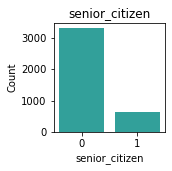

   senior_citizen  Count  Percent
0               0   3303    83.77
1               1    640    16.23
_________________________________________________________________


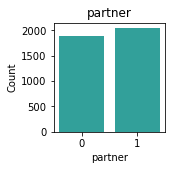

   partner  Count  Percent
0        1   2044    51.84
1        0   1899    48.16
_________________________________________________________________


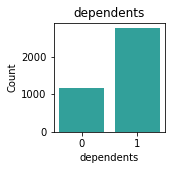

   dependents  Count  Percent
0           1   2764     70.1
1           0   1179     29.9
_________________________________________________________________


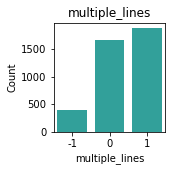

    multiple_lines  Count  Percent
 0               1   1884    47.78
 1               0   1666    42.25
-1              -1    393     9.97
_________________________________________________________________


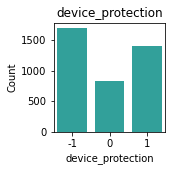

    device_protection  Count  Percent
 0                 -1   1696    43.01
 1                  1   1409    35.73
-1                  0    838    21.25
_________________________________________________________________


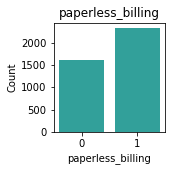

   paperless_billing  Count  Percent
1                  1   2324    58.94
0                  0   1619    41.06
_________________________________________________________________


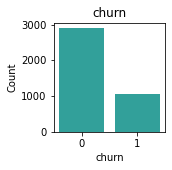

   churn  Count  Percent
0      0   2897    73.47
1      1   1046    26.53
_________________________________________________________________


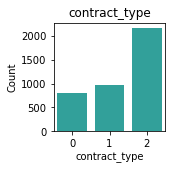

   contract_type  Count  Percent
0              2   2162    54.83
2              1    974    24.70
1              0    807    20.47
_________________________________________________________________


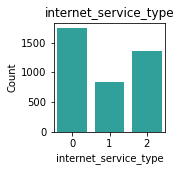

   internet_service_type  Count  Percent
2                      0   1740    44.13
1                      2   1365    34.62
0                      1    838    21.25
_________________________________________________________________


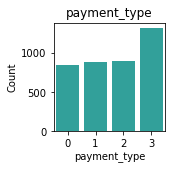

   payment_type  Count  Percent
1             3   1320    33.48
0             2    892    22.62
2             1    879    22.29
3             0    852    21.61
_________________________________________________________________


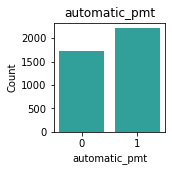

   automatic_pmt  Count  Percent
0              1   2212     56.1
1              0   1731     43.9
_________________________________________________________________


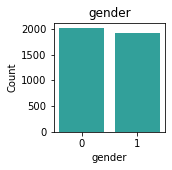

   gender  Count  Percent
1       0   2013    51.05
0       1   1930    48.95
_________________________________________________________________


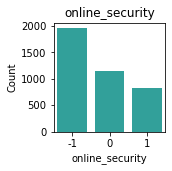

    online_security  Count  Percent
 0               -1   1956    49.61
 1                0   1149    29.14
-1                1    838    21.25
_________________________________________________________________


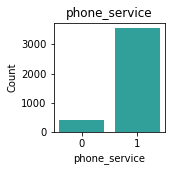

   phone_service  Count  Percent
1              1   3550    90.03
0              0    393     9.97
_________________________________________________________________


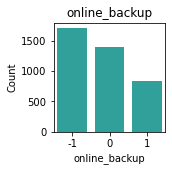

    online_backup  Count  Percent
 0             -1   1703    43.19
 1              0   1402    35.56
-1              1    838    21.25
_________________________________________________________________


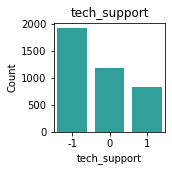

    tech_support  Count  Percent
 0            -1   1921    48.72
 1             0   1184    30.03
-1             1    838    21.25
_________________________________________________________________


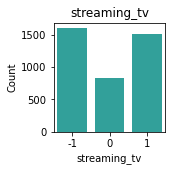

    streaming_tv  Count  Percent
 0            -1   1597    40.50
 1             1   1508    38.24
-1             0    838    21.25
_________________________________________________________________


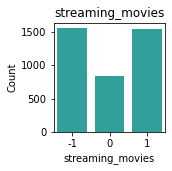

    streaming_movies  Count  Percent
 1                -1   1554    39.41
 0                 1   1551    39.34
-1                 0    838    21.25
_________________________________________________________________


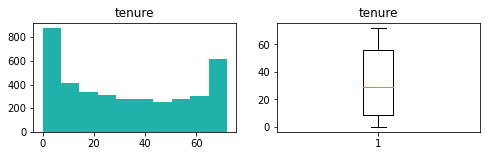

count    3943.000000
mean       32.673852
std        24.472862
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64


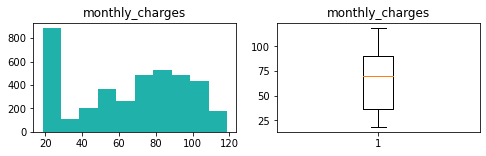

count    3943.000000
mean       65.102790
std        30.128631
min        18.550000
25%        36.200000
50%        70.400000
75%        90.050000
max       118.650000
Name: monthly_charges, dtype: float64


In [24]:
# This is one of the functions from explore.py
# This function examines univariate relationships between the features

explore.explore_univariate(train, cat_vars, quant_vars)

### Takeaways from univariate exploration <br>
- Gender is approximately half and half <br>
- Most customers (83%) are not senior citizens <br>
- Approximately half of customers have partners <br>
- Most customers (69%) do not have dependents <br>
- Most customers (90%) do have phone service <br>
- In terms of customers having internet: none > DSL > fiber optic
- Most customers do not have the bells and whistles (online security/backup, tech support) <br>
- However, most customers with internet do have device protection <br>
- Most customers with internet do have streaming movies/tv <br>
- The most common contract length is 2 years, but 1 year is only slightly higher than month-to-month <br>
- Most customers have paperless billing <br>
- Most customers have autopay <br>
- Credit card (autopay) is the most common payment type, the other types are similar to each other <br>
- Tenure looks like an upside-down bell curve, with peaks on either tail <br>
- Monthly charges looks like a bell curve, but right skewed and with a large peak on the right tail (lowest cost)
- Total charges peaks at the lowest cost, then has several large drops, then the number of customers with higher charges continually shrinks

### Bivariate exploration

senior_citizen 
_____________________

         chi2       p-value  degrees of freedom
0  106.962416  4.536923e-25                   1

observed:
 churn              0     1   All
senior_citizen                  
0               2533   770  3303
1                364   276   640
All             2897  1046  3943

expected:
              0           1
0  2426.779356  876.220644
1   470.220644  169.779356


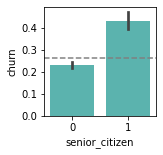


_____________________

partner 
_____________________

        chi2       p-value  degrees of freedom
0  74.137206  7.287185e-18                   1

observed:
 churn       0     1   All
partner                  
0        1382   662  2044
1        1515   384  1899
All      2897  1046  3943

expected:
              0           1
0  1501.767182  542.232818
1  1395.232818  503.767182


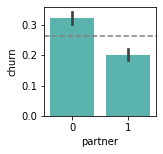


_____________________

dependents 
_____________________

         chi2       p-value  degrees of freedom
0  100.546984  1.156215e-23                   1

observed:
 churn          0     1   All
dependents                  
0           1903   861  2764
1            994   185  1179
All         2897  1046  3943

expected:
              0           1
0  2030.765407  733.234593
1   866.234593  312.765407


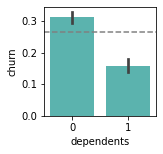


_____________________

multiple_lines 
_____________________

    chi2   p-value  degrees of freedom
0  6.928  0.031304                   2

observed:
 churn              0     1   All
multiple_lines                  
-1               295    98   393
0               1414   470  1884
1               1188   478  1666
All             2897  1046  3943

expected:
              0           1
0   288.744864  104.255136
1  1384.212021  499.787979
2  1224.043114  441.956886


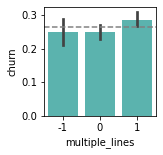


_____________________

paperless_billing 
_____________________

         chi2       p-value  degrees of freedom
0  137.624538  8.804467e-32                   1

observed:
 churn                 0     1   All
paperless_billing                  
0                  1350   269  1619
1                  1547   777  2324
All                2897  1046  3943

expected:
              0           1
0  1189.511286  429.488714
1  1707.488714  616.511286


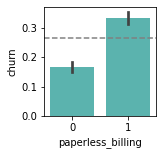


_____________________

contract_type 
_____________________

         chi2        p-value  degrees of freedom
0  670.960699  2.007869e-146                   2

observed:
 churn             0     1   All
contract_type                  
0              1234   928  2162
1               723    84   807
2               940    34   974
All            2897  1046  3943

expected:
              0           1
0  1588.464114  573.535886
1   592.918844  214.081156
2   715.617043  258.382957


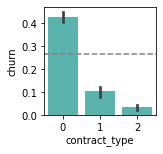


_____________________

internet_service_type 
_____________________

         chi2       p-value  degrees of freedom
0  398.382058  3.107673e-87                   2

observed:
 churn                     0     1   All
internet_service_type                  
0                       775    63   838
1                      1106   259  1365
2                      1016   724  1740
All                    2897  1046  3943

expected:
              0           1
0   615.695156  222.304844
1  1002.892468  362.107532
2  1278.412376  461.587624


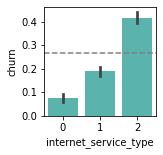


_____________________

payment_type 
_____________________

         chi2       p-value  degrees of freedom
0  352.123842  5.173628e-76                   3

observed:
 churn            0     1   All
payment_type                  
0              725   167   892
1              725   595  1320
2              730   149   879
3              717   135   852
All           2897  1046  3943

expected:
             0           1
0  655.370023  236.629977
1  969.830079  350.169921
2  645.818666  233.181334
3  625.981233  226.018767


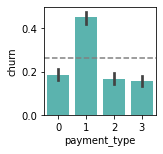


_____________________

automatic_pmt 
_____________________

        chi2       p-value  degrees of freedom
0  161.25169  6.028032e-37                   1

observed:
 churn             0     1   All
automatic_pmt                  
0              1450   762  2212
1              1447   284  1731
All            2897  1046  3943

expected:
              0           1
0  1625.200101  586.799899
1  1271.799899  459.200101


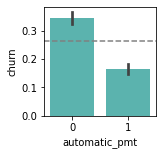


_____________________

gender 
_____________________

       chi2  p-value  degrees of freedom
0  0.156993  0.69194                   1

observed:
 churn      0     1   All
gender                  
0       1424   506  1930
1       1473   540  2013
All     2897  1046  3943

expected:
             0          1
0  1418.00913  511.99087
1  1478.99087  534.00913


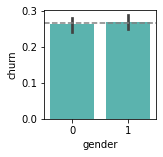


_____________________

online_security 
_____________________

         chi2        p-value  degrees of freedom
0  485.851141  3.153299e-106                   2

observed:
 churn               0     1   All
online_security                  
-1                775    63   838
0                1135   821  1956
1                 987   162  1149
All              2897  1046  3943

expected:
              0           1
0   615.695156  222.304844
1  1437.111844  518.888156
2   844.193000  304.807000


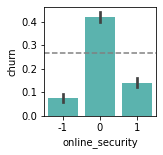


_____________________

phone_service 
_____________________

       chi2   p-value  degrees of freedom
0  0.480275  0.488298                   1

observed:
 churn             0     1   All
phone_service                  
0               295    98   393
1              2602   948  3550
All            2897  1046  3943

expected:
              0           1
0   288.744864  104.255136
1  2608.255136  941.744864


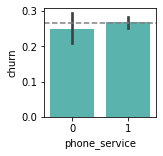


_____________________

online_backup 
_____________________

         chi2       p-value  degrees of freedom
0  324.108754  4.175210e-71                   2

observed:
 churn             0     1   All
online_backup                  
-1              775    63   838
0              1026   677  1703
1              1096   306  1402
All            2897  1046  3943

expected:
              0           1
0   615.695156  222.304844
1  1251.227745  451.772255
2  1030.077099  371.922901


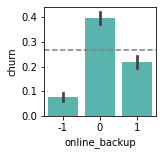


_____________________

tech_support 
_____________________

         chi2        p-value  degrees of freedom
0  482.650975  1.561969e-105                   2

observed:
 churn            0     1   All
tech_support                  
-1             775    63   838
0             1111   810  1921
1             1011   173  1184
All           2897  1046  3943

expected:
              0           1
0   615.695156  222.304844
1  1411.396652  509.603348
2   869.908192  314.091808


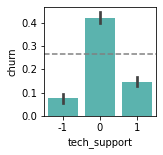


_____________________

streaming_tv 
_____________________

         chi2       p-value  degrees of freedom
0  199.554013  4.649398e-44                   2

observed:
 churn            0     1   All
streaming_tv                  
-1             775    63   838
0             1073   524  1597
1             1049   459  1508
All           2897  1046  3943

expected:
              0           1
0   615.695156  222.304844
1  1173.347451  423.652549
2  1107.957393  400.042607


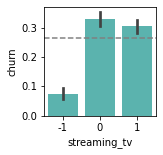


_____________________

streaming_movies 
_____________________

         chi2       p-value  degrees of freedom
0  202.120946  1.288233e-44                   2

observed:
 churn                0     1   All
streaming_movies                  
-1                 775    63   838
0                 1033   518  1551
1                 1089   465  1554
All               2897  1046  3943

expected:
              0           1
0   615.695156  222.304844
1  1139.550342  411.449658
2  1141.754502  412.245498


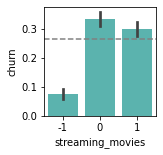


_____________________

device_protection 
_____________________

         chi2       p-value  degrees of freedom
0  301.592175  3.236618e-66                   2

observed:
 churn                 0     1   All
device_protection                  
-1                  775    63   838
0                  1034   662  1696
1                  1088   321  1409
All                2897  1046  3943

expected:
              0           1
0   615.695156  222.304844
1  1246.084707  449.915293
2  1035.220137  373.779863


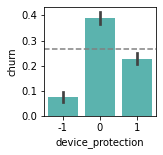


_____________________

tenure 
____________________



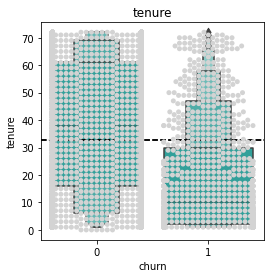

        count       mean        std  min   25%   50%   75%   max
churn                                                           
0      2897.0  37.853642  23.956034  0.0  16.0  38.0  61.0  72.0
1      1046.0  18.327916  19.709773  1.0   2.0  10.0  30.0  72.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2242516.5, pvalue=1.1957988576110993e-117)

____________________

monthly_charges 
____________________



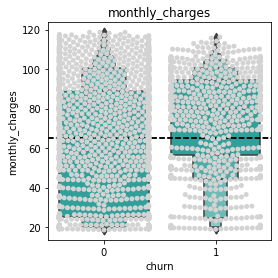

        count       mean        std    min    25%     50%      75%     max
churn                                                                     
0      2897.0  61.680877  31.166578  18.55  25.15  64.900  88.9000  118.65
1      1046.0  74.580115  24.696621  18.85  56.25  79.925  94.3875  116.20 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1160715.0, pvalue=2.891105812698731e-29)

____________________



In [25]:
# Remove the target (churn), because the target gets its own place
# in the bivariate explore function call
cat_vars_no_target = ['senior_citizen', 'partner', 'dependents','multiple_lines',
                      'paperless_billing','contract_type','internet_service_type',
                      'payment_type','automatic_pmt', 'gender', 'online_security', 
                      'phone_service', 'online_backup', 'tech_support','streaming_tv', 
                      'streaming_movies', 'device_protection']

explore.explore_bivariate(train, 'churn', cat_vars_no_target, quant_vars)

### Takeaways for bivariate exploration: <br>
- Phone service and gender where the only features without statistical significance in chi2 tests <br>
<br>
<br>
The lowest p values for features were: <br>
- contract_type             p=10**-146 <br>
- online_security           p=10**-106 <br>
- tech_support              p=10**-105 <br>
- internet_service_type     p=10**-87 <br>
- payment_type              p=10**-76 <br>
- online_backup.            p=10**-71

### Multivariate exploration

In [26]:
# There are too many features for the multivariate function to work well,
# so I will separate the features into different groups and explore
# them separately

cat_vars_customer = ['senior_citizen', 'partner', 'dependents', 'gender']

cat_vars_billing = ['paperless_billing','contract_type', 'payment_type', 
                    'automatic_pmt']

cat_vars_service = ['phone_service', 'multiple_lines', 'internet_service_type', 
                    'device_protection']

cat_vars_utilities = ['online_security', 'online_backup', 'tech_support', 
                      'streaming_tv', 'streaming_movies']

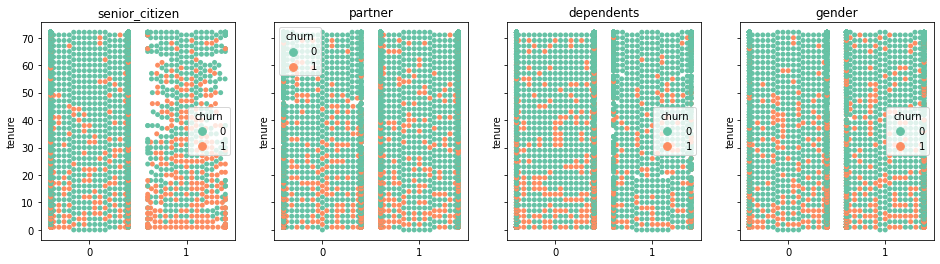

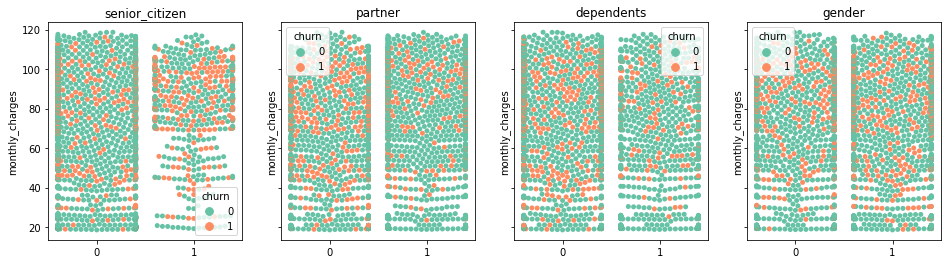

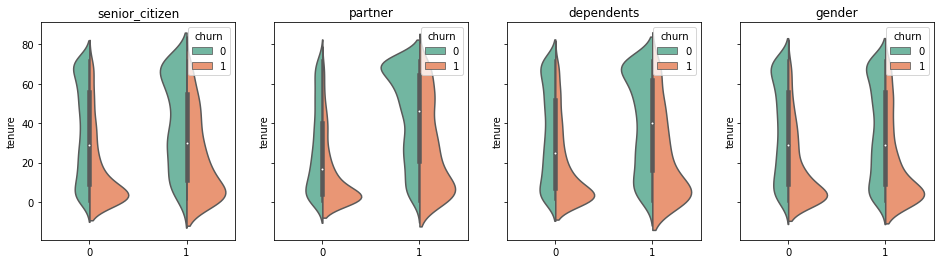

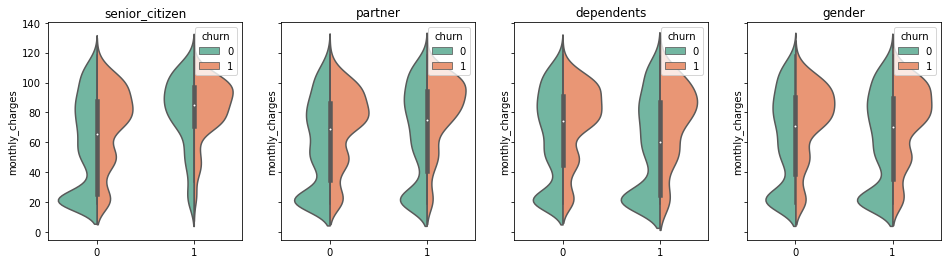

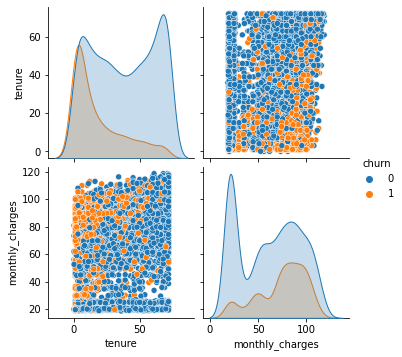

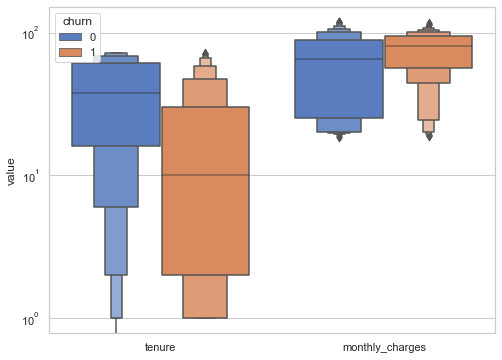

In [27]:
# Multivariate exploration of customer information
explore.explore_multivariate(train, 'churn', cat_vars_customer, quant_vars)

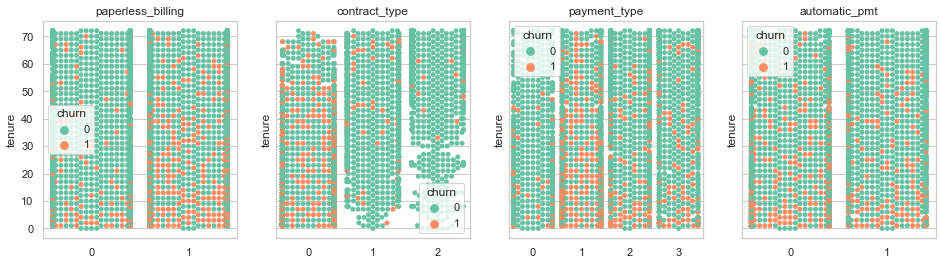

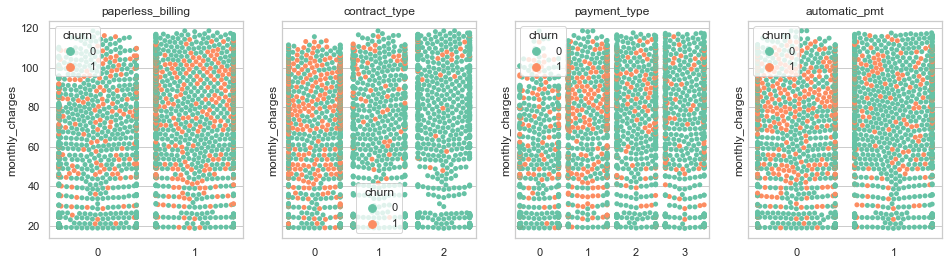

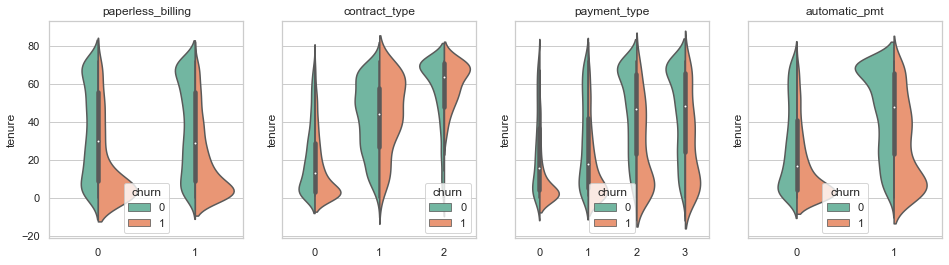

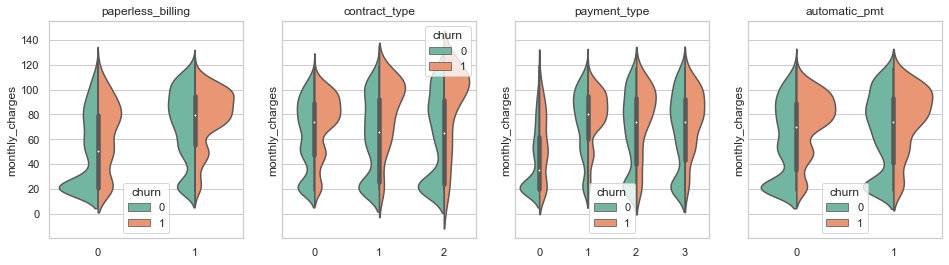

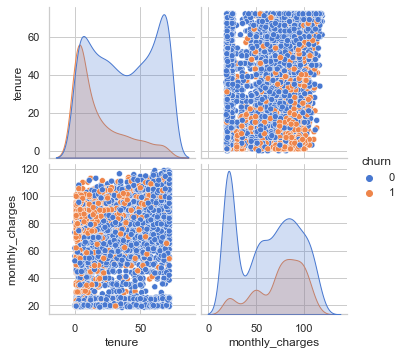

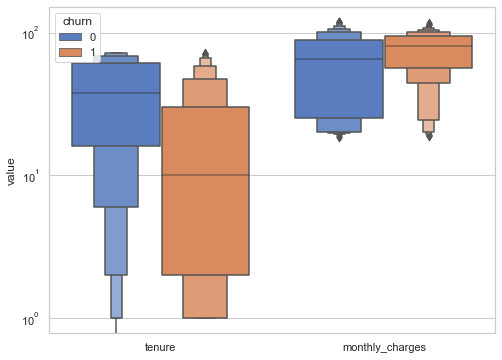

In [28]:
# Multivariate exploration of billing information
explore.explore_multivariate(train, 'churn', cat_vars_billing, quant_vars)

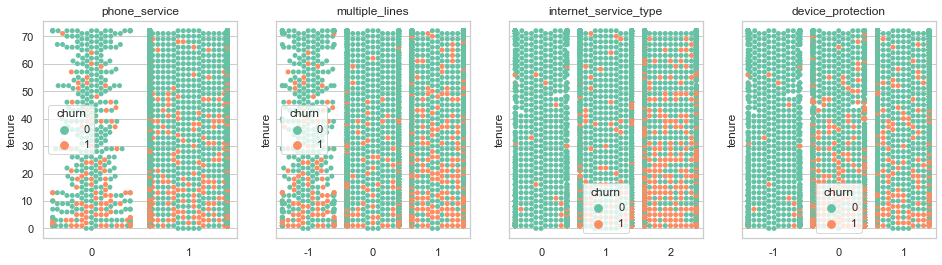

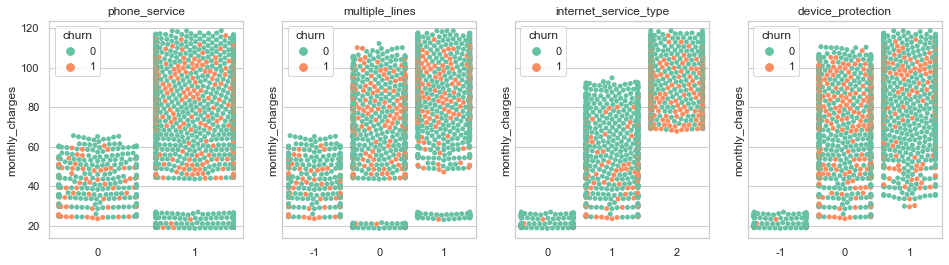

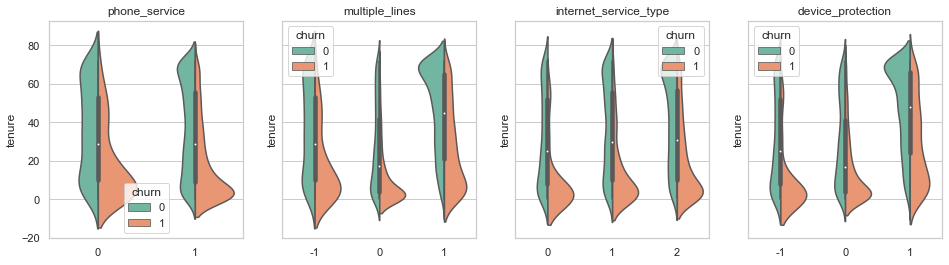

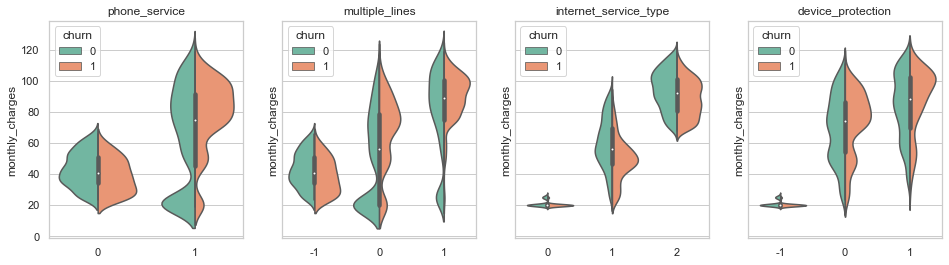

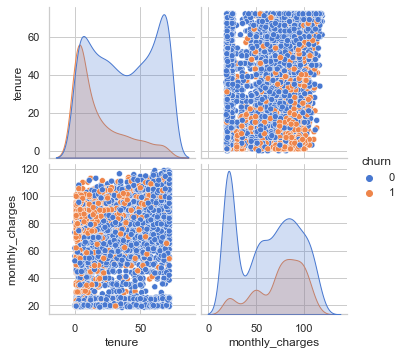

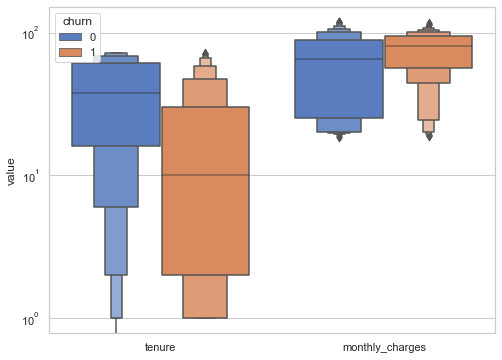

In [29]:
# Multivariate exploration of service information
explore.explore_multivariate(train, 'churn', cat_vars_service, quant_vars)

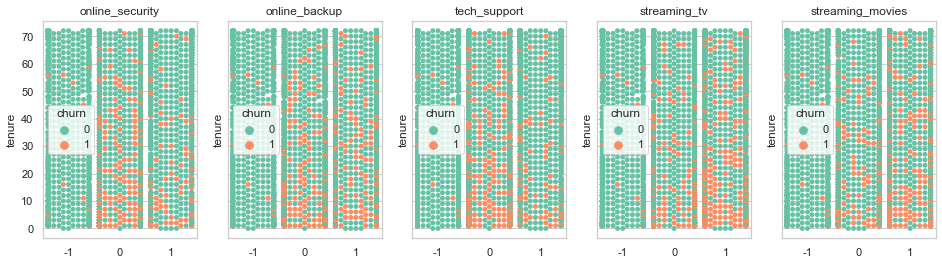

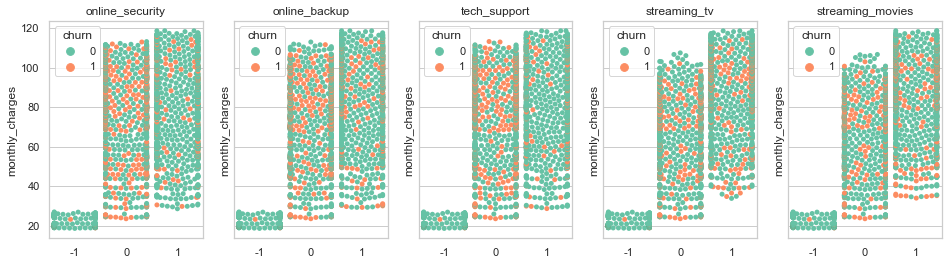

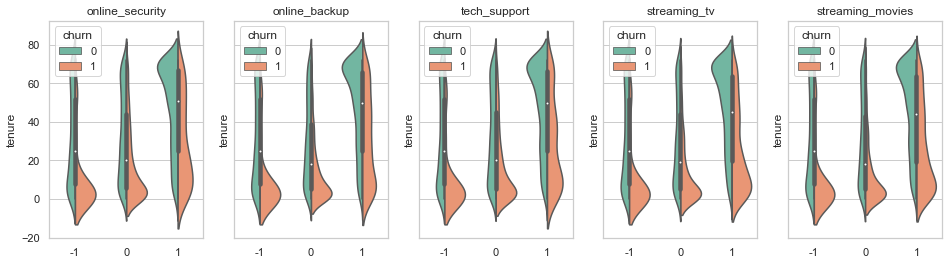

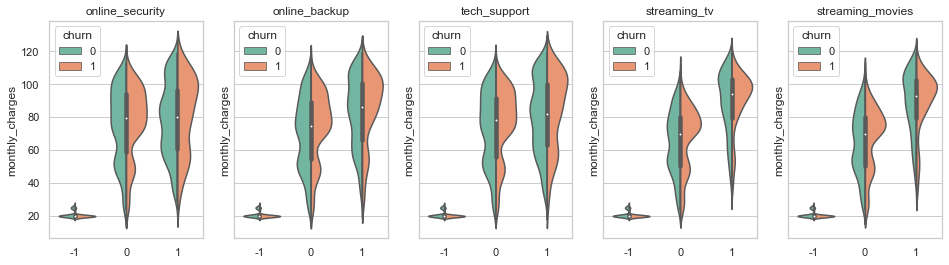

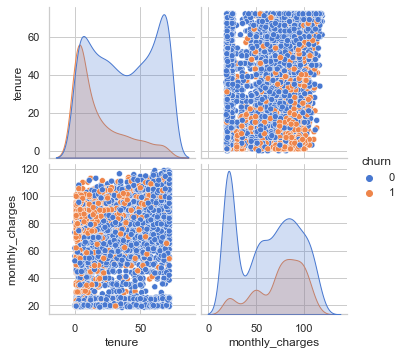

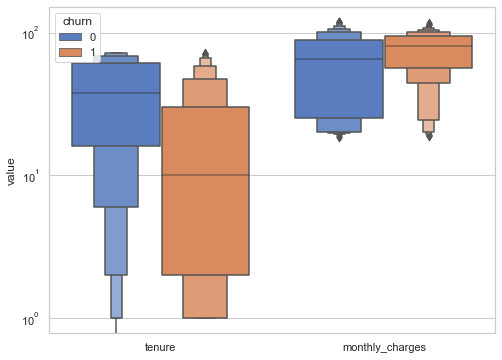

In [30]:
# Multivariate exploration of utilities information
explore.explore_multivariate(train, 'churn', cat_vars_utilities, quant_vars)

### Takeaways from multivariate exploration <br>
- Senior citizens may have more churn, and that churn may be more common with low tenure <br>
- Seniors seem to have higher monthly charges more frequently <br>
- Those without partners may have more churn at low tenure <br>
- Those without dependents may have more churn at low tenure <br>
- Paperless billing may churn more with tenure, but not with monthly charges <br>
- Month-to-month contracts have the most churn with both tenure and monthly charges <br>
- Payment type1 has the most churn with both tenure and monthly charges <br>
- Autopay has less churn with monthly charges, and at mid-high tenure <br>
- Fiber optic service has the most churn in both tenure and monthly charges, and is usually the most expensive <br>
- People without device protection may have more churn at higher monthly charges <br>
- People without online securit tend to churn more, both in tenure and monthly charges <br>
- People without online backup may have more churn at higher monthly charges <br>
- People without tech support may have more churn at higher monthly charges <br>
- Did not see a pronounced effect of streaming movies/tv on churn <br>

### Takeaways from overall exploration <br>
<br>
- gender and phone_service had little impact on churn, and can be safely dropped from models <br>
<br>
I want to limit the amount of categorical variables because there are too many <br>
I believe that the following categorical variables should be used: <br>
- contract_type <br>
- payment_type <br>
- internet_service_type <br>
- online_security <br>
- online_backup <br>
- tech_support <br>
<br>
Part of the reason that I chose these features is that they have p values less than 10^-70 <br>
A low p value does not necessarily mean affecting a large number of customers, but it does show a strong relationship, and is a starting point <br>
contract_type, payment_type, and internet_service_type have great impact on customer churn, as shown by the univariate exploration plots <br>
The other features are utilities for customers <br>
Most customers did not have these utilities, but those that did were less likely to churn <br>
<br>
I believe that the quantitative variables should be tenure and monthly_charges <br>
I am dropping total_charges because it is mostly a function of tenure and monthly_charges <br>
In addition, I don't think that total_charges is a good feature for the specific questions that I am asking now <br>
total_charges could be useful for predicting how much to invest in retaining customers while retaining a profit, but I don't think that it drives customer decisions <br>
<br>
The purpose of this strategy is to remove noise so that I can focus on the signal

# Create Model

### Creating a baseline

In [61]:
# use the mode as a baseline
baseline = y_train.mode()
matches_baseline_prediction = y_train == 0
baseline_accuracy = matches_baseline_prediction.mean()
print(f'The baseline acccuracy is {round(baseline_accuracy, 2)}')

The baseline acccuracy is 0.73


### Create labeled data subsets for models

In [41]:
# Create X & y version of train, where y is a series with just the target variable 
# and X are all the features except the target variable.
# Below is the full model with all features

X_train = train.drop(columns=['churn'])
y_train = train.churn

X_validate = validate.drop(columns=['churn'])
y_validate = validate.churn

X_test = test.drop(columns=['churn'])
y_test = test.churn

In [47]:
X_train.head()

gender  senior_citizen  partner  dependents  tenure  phone_service  \
5642       0               0        1           1      23              1   
3338       1               0        0           0      27              1   
4273       0               1        0           0       7              1   
2382       0               0        1           0      47              1   
2655       1               0        0           0      41              1   

      multiple_lines  online_security  online_backup  device_protection  \
5642               1               -1             -1                 -1   
3338               1                0              0                  1   
4273               0                0              0                  0   
2382               0                0              1                  0   
2655               0                0              1                  0   

      tech_support  streaming_tv  streaming_movies  paperless_billing  \
5642            -1            -1                -1                  1   
3338             0             1                 1                  1   
4273             0             1                 1                  1   
2382             0             1                 0                  1   
2655             1             1                 1                  1   

      monthly_charges  total_charges  contract_type  internet_service_type  \
5642            25.60         514.75              2                      0   
3338           100.50        2673.45              1                      2   
4273            89.15         574.35              0                      2   
2382            58.60        2723.40              0                      1   
2655            99.65        4220.35              2                      2   

      payment_type  automatic_pmt  
5642             3              1  
3338             2              1  
4273             1              0  
2382             2              1  
2655             3              1

In [48]:
y_train.head()

5642    0
3338    0
4273    0
2382    0
2655    0
Name: churn, dtype: int64

In [57]:
# Create a model that acts as a second baseline
# Dropping all features except:
# payment_type, internet_service_type, monthly_charges, tenure
# I believe that this includes the most important categorical variables
# This model can be used as a second baseline to compare to for more detailed models

X_train_bl2 = X_train.drop(columns=['senior_citizen', 'partner', 'dependents', 
                                    'multiple_lines','paperless_billing', 
                                    'automatic_pmt', 'gender', 'phone_service', 
                                    'streaming_tv', 'streaming_movies', 
                                    'device_protection', 'total_charges', 
                                    'online_security', 'online_backup', 'tech_support'])

X_validate_bl2 = X_validate.drop(columns=['senior_citizen', 'partner', 'dependents', 
                                    'multiple_lines','paperless_billing', 
                                    'automatic_pmt', 'gender', 'phone_service', 
                                    'streaming_tv', 'streaming_movies', 
                                    'device_protection', 'total_charges', 
                                    'online_security', 'online_backup', 'tech_support'])

X_test_bl2 = X_test.drop(columns=['senior_citizen', 'partner', 'dependents', 
                                    'multiple_lines','paperless_billing', 
                                    'automatic_pmt', 'gender', 'phone_service', 
                                    'streaming_tv', 'streaming_movies', 
                                    'device_protection', 'total_charges', 
                                    'online_security', 'online_backup', 'tech_support'])

X_train_bl2.head()

tenure  monthly_charges  contract_type  internet_service_type  \
5642      23            25.60              2                      0   
3338      27           100.50              1                      2   
4273       7            89.15              0                      2   
2382      47            58.60              0                      1   
2655      41            99.65              2                      2   

      payment_type  
5642             3  
3338             2  
4273             1  
2382             2  
2655             3

In [55]:
# Create an abreviated model based on the features chosen in the exploration takeaway
# Dropping all features except:
# contract_type, payment_type, internet_service_type, online_security, 
# online_backup, tech_support, tenure, monthly_charges

X_train_abr = X_train.drop(columns=['senior_citizen', 'partner', 'dependents', 
                                    'multiple_lines','paperless_billing', 
                                    'automatic_pmt', 'gender', 'phone_service', 
                                    'streaming_tv', 'streaming_movies', 
                                    'device_protection', 'total_charges'])

X_validate_abr = X_validate.drop(columns=['senior_citizen', 'partner', 'dependents', 
                                    'multiple_lines','paperless_billing', 
                                    'automatic_pmt', 'gender', 'phone_service', 
                                    'streaming_tv', 'streaming_movies', 
                                    'device_protection', 'total_charges'])

X_test_abr = X_test.drop(columns=['senior_citizen', 'partner', 'dependents', 
                                    'multiple_lines','paperless_billing', 
                                    'automatic_pmt', 'gender', 'phone_service', 
                                    'streaming_tv', 'streaming_movies', 
                                    'device_protection', 'total_charges'])

X_train_abr.head()

tenure  online_security  online_backup  tech_support  monthly_charges  \
5642      23               -1             -1            -1            25.60   
3338      27                0              0             0           100.50   
4273       7                0              0             0            89.15   
2382      47                0              1             0            58.60   
2655      41                0              1             1            99.65   

      contract_type  internet_service_type  payment_type  
5642              2                      0             3  
3338              1                      2             2  
4273              0                      2             1  
2382              0                      1             2  
2655              2                      2             3

### Create the model object

In [87]:
# Create a decision tree model with the desired hyper-parameters
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

### Baseline 2 model 1 decision tree

In [88]:
# Fit the model onto baseline 2 data
clf_bl2 = clf.fit(X_train_bl2, y_train)

In [89]:
# Make predictions
y_pred_bl2 = clf_bl2.predict(X_train_bl2)
y_pred_bl2[0:5]

array([0, 0, 1, 0, 0])

In [90]:
# Evaluate the model on train data
print('Accuracy of Decision Tree Classifier on training set for baseline 2: {:.2f}'
      .format(clf_bl2.score(X_train_bl2, y_train)))

Accuracy of Decision Tree Classifier on training set for baseline 2: 0.79


In [91]:
# Print classification report on train data
print(classification_report(y_train, y_pred_bl2))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2897
           1       0.71      0.37      0.48      1046

    accuracy                           0.79      3943
   macro avg       0.76      0.66      0.68      3943
weighted avg       0.78      0.79      0.77      3943



In [92]:
# Evaluate the model on validate data
print('Accuracy of Decision Tree Classifier on validate set for baseline 2: {:.2f}'
      .format(clf_bl2.score(X_validate_bl2, y_validate)))

Accuracy of Decision Tree Classifier on validate set for baseline 2: 0.79


### Abreviated model 1 decision tree

In [77]:
# Fit the model onto abreviated train data
clf_abr = clf.fit(X_train_abr, y_train)

# Evaluate the model
print('Accuracy of Decision Tree Classifier on abreviated model training set: {:.2f}'
      .format(clf_abr.score(X_train_abr, y_train)))

Accuracy of Decision Tree Classifier on abreviated training set: 0.79


In [78]:
# Evaluate the model on validate data
print('Accuracy of Decision Tree Classifier on validate set for abr model: {:.2f}'
      .format(clf_abr.score(X_validate_abr, y_validate)))

Accuracy of Decision Tree Classifier on validate set for abr model: 0.79


### Full model 1 decision tree

In [79]:
# Full model has all features
# Fit the model onto abreviated train data
clf_full = clf.fit(X_train, y_train)

# Evaluate the model
print('Accuracy of Decision Tree Classifier on full model training set: {:.2f}'
      .format(clf_full.score(X_train, y_train)))

Accuracy of Decision Tree Classifier on full model training set: 0.79


In [80]:
# Evaluate the model on validate data
print('Accuracy of Decision Tree Classifier on validate set for abr model: {:.2f}'
      .format(clf_full.score(X_validate, y_validate)))

Accuracy of Decision Tree Classifier on validate set for abr model: 0.79


### Takeaways <br>
#### Baseline 2 will be used for subsequent models because the addition features did not increase accuracy; but did increase size, complexity, and computational cost

# KNN model

In [103]:
# Create the KNN object
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

# Fit the KNN model to the training data
knn.fit(X_train_bl2, y_train)

# Make predictions
y_pred = knn.predict(X_train_bl2)

# Evaluate the model on the training data
print('Accuracy of KNN classifier on training set: {:.2f}'
      .format(knn.score(X_train_bl2, y_train)))

Accuracy of KNN classifier on training set: 0.84


In [105]:
# Create a classification report for the model on train data
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      2897
           1       0.73      0.60      0.66      1046

    accuracy                           0.84      3943
   macro avg       0.80      0.76      0.78      3943
weighted avg       0.83      0.84      0.83      3943



In [113]:
# Evaluate the model on the validate data
print('Accuracy of KNN classifier on training set: {:.2f}'
      .format(knn.score(X_validate_bl2, y_validate)))

Accuracy of KNN classifier on training set: 0.77


### Takeaways <br>
#### The KNN model shows signs of over-fitting <br>
#### The KNN model slightly underperforms the tree model on validation

# Logistic regression model

In [114]:
# Create the model object
logit = LogisticRegression(C=1, random_state=123)

# Fit the model to the training data
logit.fit(X_train_bl2, y_train)

# Make predictions
y_pred = logit.predict(X_train_bl2)

# Evaluate the model on the training data
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
      .format(logit.score(X_train_bl2, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.79


In [115]:
# Make a classification report for model on the train data
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      2897
           1       0.63      0.49      0.55      1046

    accuracy                           0.79      3943
   macro avg       0.73      0.69      0.71      3943
weighted avg       0.78      0.79      0.78      3943



In [116]:
# Evaluate the model on the validate data
print('Accuracy of Logistic Regression classifier on validate set: {:.2f}'
      .format(logit.score(X_validate_bl2, y_validate)))

Accuracy of Logistic Regression classifier on validate set: 0.80


### Takeaways <br>
#### The logistic regression model slightly increased in accuracy during validation <br>
#### The slight increase in accuracy may be a statistical fluctuation <br>
#### I am selecting this model for the test phase because it does have the highest accuracy

### Test phase for model evaluation

In [117]:
# Evaluate the model on the test data
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
      .format(logit.score(X_test_bl2, y_test)))

Accuracy of Logistic Regression classifier on test set: 0.78
